# Autoencoder Training and Image Generation


This notebook demonstrates the training of the Autoencoder and generating new images using the trained model.

In [ ]:
import torch
from torch import utils
import os
from torch.utils.data import DataLoader
from autoencoder_model import Autoencoder
from dataset import CustomDataset
from train import train_autoencoder
from generate_images import generate_images

In [ ]:
data_dir = r'C:\Users\abdur\Anime_generation\Autoencoder\images'
num_samples = 25000
batch_size = 32
num_epochs = 80
learning_rate = 3e-4

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

dataset = CustomDataset(root_dir=data_dir, num_samples=num_samples)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

model = Autoencoder().to(device)

train_autoencoder(model, dataloader, device, num_epochs=num_epochs, lr=learning_rate)

Let's find mean and st.dev. based on 2000 random images:

In [ ]:
num_epochs = 1
embeddings_list = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images in tqdm(dataloader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        images = images.to(device)

        outputs = model(images)
        emb = model.encoder(images)
        loss = criterion(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        embeddings_list.append(emb.detach().cpu())

        if len(embeddings_list) >= 2000:
            break

    if len(embeddings_list) >= 2000:
        break

all_embeddings = torch.cat(embeddings_list)
mean_embedding = all_embeddings.mean(dim=0)
std_embedding = all_embeddings.std(dim=0)

In [ ]:
num_samples = 10
# calculate your num_samples and mean based on
generate_images(model, num_samples, mean, std)

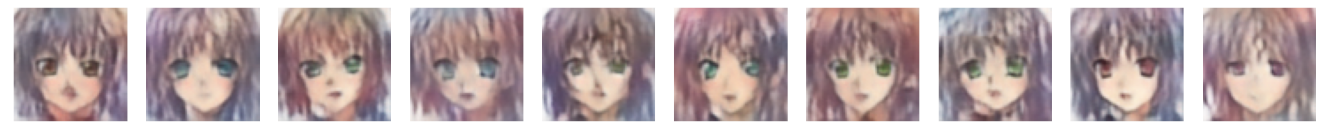